In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import math
from scipy.stats import norm
import scipy
from IPython.display import Image

# Common Probability Distributions
A probability distribution specifies the probabilities of the possible outcomes of a random variable. Examples of random variables:
- return on a stock
- earnings per share 

Use cases examples:
- the Black–Scholes–Merton option pricing model
- the binomial option pricing model (price up or price down)
- the capital asset pricing model

We can view a probability distribution in two ways:
#### Probability Function
$P(X = x)$ is the probability that a random variable $X$ takes on the value $x$. (Note that capital X represents the random variable and lowercase $x$ represents a specific value that the random variable may take.) 
- For a discrete random variable, the shorthand notation for the probability function is $p(x) = P(X = x)$. 
- For continuous random variables, the probability function is denoted $f(x)$ and called the probability density function (pdf), or just the density.

#### Cumulative Distribution Function (cdf)
It gives the probability that a random variable X is less than or equal to a particular value x, P(X ≤ x). For both discrete and continuous random variables, the shorthand notation is $F(x) = P(X ≤ x).$ 


The cdf has two other characteristic properties:
- The cdf lies between 0 and 1 for any $x$: $0 ≤ F(x) ≤ 1$.
- As we increase $x$, the cdf either increases or remains constant.

## Discrete Random Variables
The mathematical operation that corresponds to finding the area under the curve of a pdf $f(x)$ from $a$ to $b$ is the integral of $f(x)$ from $a$ to $b$:

$$P(a\le X\le b)=\int^b_af(x)dx$$
<div style="text-align: right"> Equation 2 </div>

*Note: For any continuous random variable $X$, $P(a ≤ X ≤ b) = P(a < X ≤ b) = P(a ≤ X < b) = P(a < X < b)$, because the probabilities at the endpoints $a$ and $b$ are $0$.*
### The Uniform Distribution 
Probability distribution that describes equally likely outcomes. <br>
#### Discrete Uniform Distribution
The pdf for a uniform random variable is:
\begin{equation}
  f(x) =
   \begin{cases}
      \frac{1}{b−a} & \text{for a<x<b}\\
      0 & \text{otherwise}
   \end{cases}       
\end{equation}

### The Binomial Distribution（二项分布）
When we make probability statements about a record of successes and failures, or about anything with binary outcomes, we often use the binomial distribution.<br>


$X$~$B(n,p)$ read as “X has a binomial distribution with parameters n and p.”<br>

The building block of the binomial distribution is the **Bernoulli random variable**. A trial (an event that may repeat) that produces one of two outcomes. Such a trial is a `Bernoulli trial`. If we let $Y= 1$ when the outcome is success and $Y = 0$ when the outcome is failure, then the probability function of the `Bernoulli random variable` $Y$ is
$$p(1) = P(Y = 1) = p$$
$$p(0) = P(Y = 0) = 1 – p$$
where $p$ is the probability that the trial is a success. 

For $X$ distributed $B(n, p)$, the probability of $x$ successes in $n$ trials is given by
$$p(x)=P(X=x)=\binom{n}xp^x(1−p)^{n−x}=\frac{n!}{(n−x)!x!}p^x(1−p)^{n−x}$$
<div style="text-align: right"> Equation 1 </div>

When modeling stock price movements, the time periods can be made extremely small. Then the number of periods, $n$, can be large. The probability of exactly $x$ up moves in $n$ trials is:

$$p(x)=P(X=x)=\binom{n}xp^x(1−p)^{n−x}=\frac{n!}{(n−x)!x!}p^x(1−p)^{n−x}$$

Given independent trials, any sequence with $x$ up moves must occur with probability $p^x(1 − p)^{n–x}$. The binomial distribution is only symmetric if $p=0.50$. The mean of a binomial distribution is $np$ and the variance is $np(1−p)$.

#### Mean and Variance of Binomial Random Variables
Because a single Bernoulli random variable, Y ~ B(1, p), takes on the value 1 with probability p and the value 0 with probability 1 − p, its mean or weighted-average outcome is p. Its variance is p(1 − p).9 A general binomial random variable, B(n, p), is the sum of n Bernoulli random variables, and so the mean of a B(n, p) random variable is np. 

In [20]:
des = {'X~B(n,p)': ['Bernoulli, B(1, p)', 'Binomial, B(n, p)'],
      'Mean': ['p', 'np'], 
      'Variance': ['p(1-p)', 'np(1-p)']}
df = pd.DataFrame(data=des)
df

,"X~B(n,p)",Mean,Variance
0,"Bernoulli, B(1, p)",p,p(1-p)
1,"Binomial, B(n, p)",np,np(1-p)


#### Example 
Consider a random variable distributed B(n = 5, p = 0.50):

In [2]:
data = {'Number of Up Moves, x':[0,1,2,3,4,5]}
df = pd.DataFrame(data=data)
df

,"Number of Up Moves, x"
0,0
1,1
2,2
3,3
4,4
5,5


In [3]:
# For convenience of calculation, turning the column into a list
x = pd.to_numeric(df['Number of Up Moves, x'].to_list())
x
p = 0.50
n = 5

In [4]:
# Counting number of ways to choose X from n
results = []
numerator = math.factorial(5) # why 5 instead of 6 (i.e., len(x))?

for i in x:
    denominator = math.factorial(5-i) * math.factorial(i)
    result = numerator/denominator
    results.append(result)
print(results)

# Append a column to represent the results
df['Number of Possible Ways to Reach x Up Moves'] = results

[1.0, 5.0, 10.0, 10.0, 5.0, 1.0]


In [5]:
# Calculating P of each way
results2 = []
for i in x: 
    result = p**i * (1-p)**(n-i)
    results2.append(result)

# Append the list to a new column    
df['Probability for Each Way'] = results2

In [6]:
# Calculating the probability for each value of the number of up moves from the first column (using an alternative approach)
df['Probability for x, p(x)'] = df['Number of Possible Ways to Reach x Up Moves'] * (1/sum(results))

In [7]:
# Cumulating the entries in the fourth column, the cumulative distribution function
cdf = []
pdf = df['Probability for x, p(x)'].to_list()

# Calculate the cdf
for i in range(len(pdf)):
    result3 = pdf[0:i+1]
    print(result3)
    cdf.append(sum(result3))
    
# Append the list to a new column
df['F(x) = P(X ≤ x)'] = cdf

[0.03125]
[0.03125, 0.15625]
[0.03125, 0.15625, 0.3125]
[0.03125, 0.15625, 0.3125, 0.3125]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625]
[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]


In [8]:
df

,"Number of Up Moves, x",Number of Possible Ways to Reach x Up Moves,Probability for Each Way,"Probability for x, p(x)",F(x) = P(X ≤ x)
0,0,1.0,0.03125,0.03125,0.03125
1,1,5.0,0.03125,0.15625,0.18750
2,2,10.0,0.03125,0.31250,0.50000
3,3,10.0,0.03125,0.31250,0.81250
4,4,5.0,0.03125,0.15625,0.96875
5,5,1.0,0.03125,0.03125,1.00000


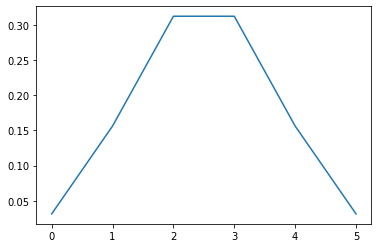

In [9]:
# Observe how the change of p(x) influence the skewness of the curve
plt.plot(df['Probability for x, p(x)']);

#### Example 

In [10]:
data = {'Block Brokers': ['BB001', 'BB002'], 
       'Profitable Trades': [3, 5], 
       'Losing Trades': [9, 3]}
df = pd.DataFrame(data=data)
df

,Block Brokers,Profitable Trades,Losing Trades
0,BB001,3,9
1,BB002,5,3


If you are paying a fair price on average in your trades with a broker, what should be the probability of a profitable trade?

In [11]:
# 

Under the assumption that the prices of trades were fair,
1. calculate the probability of three or fewer profitable trades with broker BB001.
2. calculate the probability of five or more profitable trades with broker BB002.

In [12]:
# 

#### Example: using binomial distribution to evaluate the performance of an investment manager<br>

Expected to keep portfolio return within a band of 75 basis points (bps) of the benchmark’s return, on a quarterly basis, portfolio return is within the 75 bps band 90 percent of the time.

Question: The manager meets the objective in six out of eight quarters. How does the manager’s record precisely relate to your expectation of a 90 percent success rate and the sample size, 8 observations?

In [13]:
# List of known variables
n = 8
p = 0.90

In [14]:
# find the probability that, given an assumed true or underlying success rate of 90 percent, performance could be as bad as or worse than that delivered.
data = {'Number of Success (>=75 bps)':[0,1,2,3,4,5,6,7,8]}
df = pd.DataFrame(data=data)
df

,Number of Success (>=75 bps)
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


In [15]:
results = []
numerator = math.factorial(n) 
x = df['Number of Success (>=75 bps)'].to_list()
# Counting the number of ways to reach the corresponding sucesses
for i in x:
    denominator = math.factorial(n-i) * math.factorial(i)
    result = numerator/denominator
    results.append(result)
print(results)

# Append a column to represent the results
df['Number of Possible Ways to Reach x'] = results

[1.0, 8.0, 28.0, 56.0, 70.0, 56.0, 28.0, 8.0, 1.0]


In [16]:
# Probability of each way 
results = []
for i in x:
    p_x = p**i
    p_y = (1-p)**(n-i)
    result = p_x * p_y
    results.append(result)
df['Probability for Each Way'] = results

In [17]:
# 
df['Probability for x, p(x)'] = df['Number of Possible Ways to Reach x'] * df['Probability for Each Way']

In [18]:
df

,Number of Success (>=75 bps),Number of Possible Ways to Reach x,Probability for Each Way,"Probability for x, p(x)"
0,0,1.0,1.000000e-08,1.000000e-08
1,1,8.0,9.000000e-08,7.200000e-07
2,2,28.0,8.100000e-07,2.268000e-05
3,3,56.0,7.290000e-06,4.082400e-04
4,4,70.0,6.561000e-05,4.592700e-03
5,5,56.0,5.904900e-04,3.306744e-02
6,6,28.0,5.314410e-03,1.488035e-01
7,7,8.0,4.782969e-02,3.826375e-01
8,8,1.0,4.304672e-01,4.304672e-01


In [19]:
# Solving for P(x>0.75), i.e. number of success of 6
cdf = df['Probability for x, p(x)'].to_list()
print(sum(cdf[0:7]))
print('There is a moderate 18.7 percent probability that the manager would show the record he did (or a worse record) if he had the skill to meet your expectations 90 percent of the time.')

0.18689526999999992
There is a moderate 18.7 percent probability that the manager would show the record he did (or a worse record) if he had the skill to meet your expectations 90 percent of the time.


*Note: You can use other evaluation concepts such as tracking error or tracking risk, defined as the standard deviation of return differences between a portfolio and its benchmark, to assess the manager’s performance.*

## Continuous Random Variables
Use cases: 
- modern portfolio theory 
- risk management technologies
- an approximate model for returns

### Continuous Uniform Distribution
For a continuous uniform random variable between a and b,
\begin{equation}
  f(x) =
   \begin{cases}
      \frac{1}{b−a} & \text{for a<x<b}\\
      0 & \text{otherwise}
   \end{cases}       
\end{equation}

and 

\begin{equation}
  f(x) =
   \begin{cases}
      0 & \text{for $x\le a$}\\
      \frac{x-a}{b-a} & \text{for a<x<b}\\
      1 & \text{for $x \geqslant b$}
   \end{cases}       
\end{equation}

For a continuous distribution, the probability of any fixed value is zero because there is an infinite number of outcomes.
### The Normal Distribution 
The normal distribution is popular for quantitative work. This is partly because of the `central limit theorem` – the sum of a large number of independent random variables is approximately normally distributed.

**Characteristics**: 
- The normal distribution can be completely described by two parameters – mean ($μ$) and variance ($σ^2$). Defined as $X∼N(μ,σ^2)$ *(read “X follows a normal distribution with mean $μ$ and variance $σ^2$”)*. 
- It is symmetric (skewness = 0) and has a **kurtosis of 3**. 
- The mean, median, and mode are all the same. 
- Also, a linear combination of two or more normal random variables is (also) normally distributed.

#### Multivariate Distribution
A multivariate normal distribution for the returns on $n$ stocks is completely defined by three lists of parameters:
- the list of the mean returns on the individual securities (n means in total);
- the list of the securities’ variances of return (n variances in total); and
- the list of all the distinct pairwise return correlations: n(n − 1)/2 distinct correlations in total.

**In order to specify the normal distribution for portfolio return, we need the means, variances, and the distinct pairwise correlations of the component securities.**

$$f(x)=\frac{1}{σ\sqrt{2π}}exp\big(\frac{−(x−μ)^2}{2σ^2}\big)\ \ \  for−∞<x<+∞$$
<div style="text-align: right"> Equation 3 </div>

The normal density with $μ = 0$ and $σ = 1$ is called the `standard normal distribution` (or `unit normal distribution`). 
##### Normal Distribution as an Approximate Model for Returns
The normal distribution is used to model many security returns. However, the fit is not good for distributions with fat tails (i.e., high kurtosis) or asymmetry. 
- The normal distribution is a closer fit for quarterly and yearly holding period returns on a diversified equity portfolio than it is for daily or weekly returns.
- Normal distribution tends to underestimate the probability of extreme returns. (Since actual return distribution is more fat-tailed).
- Option returns are skewed. Cautious in using the normal distribution to model the returns on portfolios containing **significant positions in options**.
- The normal distribution is not appropriate for asset prices with a `floor` of zero, even though it is a reasonable fit for asset returns.

Having established that the normal distribution is the appropriate model for a variable of interest, we can use it to make the following probability statements:
- Approx. 50\% of all observations fall in the interval μ ± (2/3)σ.
- Approx. 68% of all observations fall in the interval μ ± σ.
- Approx. 95% of all observations fall in the interval μ ± 2σ.
- Approx. 99% of all observations fall in the interval μ ± 3σ.

In most cases, the population mean and standard deviation must be estimated from samples. This creates an unlimited number of normal distributions.
#### Standardizing a Random Variable
It is often useful to standardize the normal random variable $X$ by subtracting the mean and dividing by the standard deviation. This results in a `standard normal random variable` $Z$ that is normally distributed with a mean of 0 and a standard deviation of 1.

If we have $X$ ~ $N(μ,σ^2)$ (read “$X$ follows the normal distribution with parameters $μ$ and $σ^2$”), we standardize it using the formula

$$Z = \frac{(X – μ)}{σ}$$
<div style="text-align: right"> Equation 4 </div>

Tables can be used to determine `cumulative normal distribution` values for $Z$ (i.e., $P(Z≤x)=N(x)$) (`z-score`), N(x) is a conventional notation for the cdf of a standard normal variable (from the z-score table):

$$N(−x)=P(Z≥x)=1−N(x)$$
$$N(x)=P(Z≤x)=P(Z≥−x)$$

Some of the most frequently used values are:
- The 90th percentile point is 1.282
- The 95th percentile point is 1.650
- The 99th percentile point is 2.327

The probability that we will observe a value as small as or smaller than 9.5 for $X ~ N(5,1.5)$ is exactly the same as the probability that we will observe a value as small as or smaller than 3 for $Z ~ N(0,1)$. We can answer all probability questions about X using standardized values and probability tables for Z.

\[Revisit Example 8\]
### Applications of the Normal Distribution
`Mean–variance analysis` generally considers risk symmetrically in the sense that standard deviation captures variability both above and below the mean. An alternative approach evaluates only `downside risk`. 
#### Shortfall Risk and Selecting an Optimal Portfolio Using Roy’s Safety-first Criterion
`Safety-first rules` focus on `shortfall risk`, the risk that portfolio value will fall below some minimum acceptable level (over some time horizon).

$$SFRatio = \frac{[E(R_P) – R_L]}{σ_P}$$

The quantity $E(R_P) − R_L$ is the distance from the mean return to the shortfall level. Dividing this distance by $σ_P$ gives the distance in units of standard deviation.

For a portfolio with a given safety-first ratio, the probability that its return will be less than $R_L$ is $N(−SFRatio)$, and the `safety-first optimal portfolio` has the lowest such probability:

$$P(R_P<R_L)=N(−SFRatio)$$

The SFRatio is just the `Sharpe ratio` with $R_L$ substituted for $R_F$.

[Table of the Standard Normal Cumulative Distribution Function](https://courses.cs.washington.edu/courses/cse312/18sp/sections/08/phi_table.pdf)

Risk at financial institutions is often measured with `stress testing` and `Value at Risk (VaR)`:
- Stress testing uses very unfavorable events or scenarios (`scenario analysis`) to manage the risk. 
- VaR measures the `minimum` losses expected over a specified time period at a given probability.

### Lognormal Distribution and Continuous Compounding
The `lognormal distribution` is also widely used in financial modeling, including by the `Black-Scholes-Merton model`. If a random variable $Y$ follows a lognormal distribution, then $ln(Y)$ is normally distributed. The lognormal distribution is bounded below by $0$ and is skewed to the right. This makes it a good choice for asset prices.
- Mean ($μ_L$) of a lognormal random variable = 
$$exp(μ + 0.50σ^2)=e^{μ+0.5σ^2}$$

- Variance ($σ_L^2$) of a lognormal random variable = 
$$exp(2μ + σ^2) × [exp(σ^2) − 1]=e^{2μ+σ^2}\Big(e^{σ^2}−1\Big)$$

where $μ$ and $σ^2$ are the mean and variance of the associated normal distribution.
#### Relationship between the Distribution of Stock Return and Stock Price 
(theoretical foundation for using the lognormal distribution to model prices)
- if a stock’s continuously compounded return is normally distributed, then the future stock price is necessarily lognormally distributed. 
- stock price may be well described by the lognormal distribution even when continuously compounded returns do not follow a normal distribution. 

#### Price Relative
The `price relative`, is an ending price over a beginning price; it is equal to 1 plus the holding period return on the stock from $t = 0$ to $t = 1$:

$$\frac{S_1}{S_0} = 1 + R_{0,1}$$

$$\frac{S_{t+1}}{S_t} = 1 + R_{t,t+1}$$ 

where $R_{t,t+1}$ is the rate of return from $t$ to $t + 1$.
#### Continuously Compounded Return
The continuously compounded return associated with a holding period is the natural logarithm of 1 plus that holding period return, or equivalently, the natural logarithm of the ending price over the beginning price (the price relative).

The `continuously compounded return` from $t$ to $t + 1$ is

$$r_{t,t+1} = ln\Big(\frac{S_{t+1}}{S_t}\Big) = ln(1 + R_{t,t+1})$$
<div style="text-align: right"> Equation 5 </div>

The continuously compounded return is smaller than the associated `holding period return`. 

Continuously compounded return to time $T$ is the sum of the one-period continuously compounded returns:

$$r_{0,T} = r_{T–1,T} + r_{T–2,T–1} + …r_{0,1}$$
<div style="text-align: right"> Equation 6 </div>

Then, the continuously compounded return to the investment horizon $T$ is 

$$r_{0,T}=ln\Big(\frac{S_T}{S_0}\Big)$$

This implies 

$$S_T=S_0e^{r_{0,T}}$$

#### Relation between the Mean and Variance of Continuously Compounded Returns Associated with Different Time Horizons
A key assumption in many investment applications is that returns are **`independently and identically distributed (IID)`**. Independence captures the proposition that investors cannot predict future returns using past returns (i.e., weak-form market efficiency). Identical distribution captures the assumption of stationarity.

Assume that the one-period continuously compounded returns (such as $r_{0,1}$) are IID random variables with mean $μ$ and variance $σ^2$ (but making no normality or other distributional assumption). Then

(Assuming the period returns are independently and identically distributed yields the following:)

$$E(r_{0,T}) = E(r_{T–1,T}) + E(r_{T–2,T–1}) + … + E(r_{0,1}) = μT$$
<div style="text-align: right"> Equation 7 </div>

(we add up $μ$ for a total of $T$ times) and

$$σ^2(r_{0,T}) = σ^2T$$  
<div style="text-align: right"> Equation 8 </div>

This is true even if the individual time period returns are not normally distributed.

we can model future stock price $S_{T}$ as a lognormal random variable because $r_{0,T}$ should be at least approximately normal. 

$$S_T = S_0exp(r_{0,T}) $$
#### Volatility
Volatility is the standard deviation of the continuously compounded returns on the underlying asset.

In practice, we very often estimate volatility using a historical series of continuously compounded daily returns. We gather a set of daily holding period returns and then use Equation 5 to convert them into continuously compounded daily returns. We then compute the standard deviation of the continuously compounded daily returns and annualize that number using Equation 8.

**Example**
Suppose an investor views any return below a level of $R_L$ as unacceptable. Roy’s safety-first criterion states that the optimal portfolio minimizes the probability that portfolio return, $R_P$, falls below the threshold level, $R_L$. In symbols, the investor’s objective is to choose a portfolio that minimizes $P(R_P < R_L)$.

When portfolio returns are normally distributed, we can calculate $P(R_P < R_L)$ using the number of standard deviations that $R_L$ lies below the expected portfolio return, $E(R_P)$. The portfolio for which $E(R_P) − R_L$ is largest relative to standard deviation minimizes $P(R_P < R_L)$. Therefore, if returns are normally distributed, the safety-first optimal portfolio maximizes the safety-first ratio (SFRatio).

**Example**

In [22]:
data = {'Mean and Std (%)':['Expected annual return', 'Standard deviation of return'], 
       'A':[25, 27], 
       'B':[11, 8], 
       'C':[14, 20]}
df = pd.DataFrame(data=data)
df

,Mean and Std (%),A,B,C
0,Expected annual return,25,11,14
1,Standard deviation of return,27,8,20


In [23]:
# Known variables
principal = 800000 
min_goal = 30000

In [24]:
# Solving for the R_L shortfall level 
rl = 100* (min_goal / (principal + 1)) # min_goal = rl * (principal + 1)
rl

3.749995312505859

In [25]:
# Comparing the SFRatio of the three allocations 
sf_a = (df['A'][0] - rl) / df['A'][1]
sf_b = (df['B'][0] - rl) / df['B'][1]
sf_c = (df['C'][0] - rl) / df['C'][1]
print(sf_a, sf_b, sf_c)

0.7870372106479311 0.9062505859367675 0.512500234374707


In [26]:
# Allocation B's probability of lower than R_L returns: N(−SFRatio)
#N(−0.91) = 1 − N(0.91) = 1 − 0.8186 = 0.1814 
1 - norm.cdf(0.9062505859367675)

0.1824016168069592

**Example: estimation of volatility**

In [28]:
data = {'Day':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], 
       'Closing Price (IDR)':[6.950, 7.000, 6.850, 6.600, 6.350]}
df = pd.DataFrame(data=data)
df

,Day,Closing Price (IDR)
0,Monday,6.95
1,Tuesday,7.00
2,Wednesday,6.85
3,Thursday,6.60
4,Friday,6.35


In [29]:
# Estimate the volatility of Astra shares. (Annualize volatility based on 250 days in a year.)


In [30]:
# Identify the probability distribution for Astra share prices if continuously compounded daily returns follow the normal distribution.


## Monte Carlo Simulation
Monte Carlo simulation uses computers to generate many random samples from a specified probability distribution. (An approach to estimating a probability distribution of outcomes to examine **what might happen if particular risks are faced**.) 
- it provides only statistical estimates, not exact results. 
- generates a large number of random samples from a specified probability distribution or distributions to represent the role of risk in the system.
- requires the identification of risk factors associated with the problem and specify probability distributions for them. 

Steps of Monte Carlo simulation:
1. Specify the quantities of interest in terms of underlying variables.
2. Split the time horizon into subperiods.
3. Specify the distributional assumptions for the underlying risk factors.
4. Use a computer program to draw K random values of each risk factor.
5. Calculate the underlying variables based on the random values drawn.
6. Compute the quantities of interest.
7. Repeat steps 4 to 6 for N trials. The Monte Carlo estimate is the mean quantity of interest over the N trials.

### Application Examples
- valuing complex securities (e.g. securities with embedded options)
- planning
- develop estimates of VaR

### Comparison/Alternatives
A drawback of this approach is that any risk not represented in the time period selected (for example, a stock market crash) will not be reflected in the simulation.

`Historical simulation` (or `back simulation`) is an alternative to Monte Carlo simulation. It assumes the past applies to the future. However, unlike the Monte Carlo method, historical simulation does not let itself to "what if" analyses because it only reflects the tendencies that appear in the data.

`Analytical methods`, such as the Black-Scholes-Merton model provide more `cause-and-effect analysis` than the Monte Carlo method, which provides probability-based estimates rather than exact results.

# Sampling and Estimation
## Sampling
    During the exam, you are expected to know the common values for a standard normal distribution (i.e., 85%, 90%, 95%, 97.5%, and 99%). However, if a question requires information from any other distribution table, the relevant portion of the table will be provided with the question.
### Simple Random Sampling 
A sampling plan is needed to set the rules used to select a sample. In a simple random sample, each population element has an equal probability of being selected. It is also often called just a random sample.

Simple random sampling requires randomness. This could be done by assigning each member of the population a random number and using a computer program or table of random digits to choose the members.

Another approach is `systematic sampling`. This method chooses every $k_{th}$ member until the desired sample size is reached.

- The `sampling error` is the difference between the `sample statistic` and the `population parameter` (e.g., the sample mean and the population mean). 
- The `sampling distribution` of a statistic is the distribution of all statistic values calculated from the same sample size from the same population.

### Stratified Random Sampling
In a `stratified random sampling`, the population is first divided into subgroups (strata) based on some criteria. Simple random samples are drawn from each subgroup in proportion to the subgroup's relative size to the entire population. This method results in less variance than estimates derived from simple random sampling.

Stratified sampling is commonly used to create portfolios that are meant to track a `bond index`. 
1. First, the entire population of bonds in the index is divided into subgroups based on factors such as maturity, sector, credit quality, etc. 
2. The manager then selects a sampling of bonds from within each subgroup.

### Time-Series and Cross-Sectional Data
Assumptions: the sampled returns come from the same population. It is important that the data come from the same population. For time-series data, this means the time period should not be too long because fundamental changes could have occurred (e.g., economic recession). 

Cross-sectional data are data on certain characteristics of individuals or groups at a single point in time (e.g., year-end P/E ratios for all S&P 500 companies). Assumptions: we must be sure that all the data do come from the same underlying population. (for example, analysts often summarize company-level data by industry). 
### Distribution of the Sample Mean
The `sample mean` is a random variable with a probability distribution called the statistic's sampling distribution.

**The `Central Limit Theorem`**: Given a population described by any probability distribution having mean $μ$ and **finite** variance $σ^2$, the sampling distribution of the sample mean $\bar{X}$ computed from samples of size $n$ from this population will be approximately normal with mean $μ$ (the population mean) and variance $\frac{σ^2}{n}$ (the population variance divided by $n$) when the sample size $n$ is large (usually greater than 30).

**The `Standard Error of the Sample Mean (SEM)`**: For sample mean $\bar{X}$ calculated from a sample generated by a population with standard deviation $σ$, the standard error of the sample mean is given by one of two expressions:

$$σ\bar{X}=\frac{σ}{\sqrt{n}}$$
<div style="text-align: right"> Equation 1 </div>

- when we know $σ$, the population standard deviation, or by

$$s\bar{X}=\frac{s}{\sqrt{n}}$$
<div style="text-align: right"> Equation 2 </div>

- when we do not know the population standard deviation and need to use the sample standard deviation, $s$, to estimate it.

In practice, we almost always need to use Equation 2. The estimate of $s$ is given by the square root of the sample variance, $s^2$, calculated as $s^2=\frac{\sum_{i=1}^n{(Xi−\bar{X})^2}}{n−1}$
<div style="text-align: right"> Equation 3 </div>

To summarize, according to the central limit theorem, when we sample from any distribution, the distribution of the sample mean will have the following properties as long as our sample size is large:
- The distribution of the sample mean $\bar{X}$ will be approximately normal.
- The mean of the distribution of $\bar{X}$ will be equal to the mean of the population $\mu$ from which the samples are drawn.
- The variance of the distribution of $\bar{X}$ will be equal to the variance $\sigma^2$ of the population divided by the sample size.

## Point and Interval Estimates of the Population Mean
The two branches of `statistical inference` are `estimation` and `hypothesis testing`. 
- Estimation seeks to find the value of the parameter.
- Hypothesis testing seeks to find if the value of a parameter equals some specific value. 

### Point Estimators
Estimators are the formulas used to calculate the sample statistics. Estimates are the particular values derived from these estimators.
- **Unbiased** estimators' expected value (the mean of its sampling distribution) equals the parameter it is intended to estimate.
- **Efficient unbiased** estimators have the smallest sampling distribution variance for a given sample size. Repeated samples will generate results that are tightly grouped around the parameter.
- **Consistent** estimators get closer to the population parameter's value as the sample size increases.

### Confidence Intervals
A point estimate is unlikely to exactly equal the population parameter due to sampling error. An `interval estimate` is often more appropriate.

A `confidence interval` is a range for which one can assert with a given probability $1 − α$, (called the `degree of confidence`), where α is the `significance level`, that it will contain the parameter it is intended to estimate. This interval is often referred to as the `$100(1 − α)\%$ confidence interval for the parameter`. 

    For example, using a 5% significance level creates a 95% confidence interval around the sample mean. We can be 95% confident that the population mean falls somewhere in this interval.
#### Construction of Confidence Intervals
A $100(1−α)\%$ confidence interval is calculated by:

$$Point\ estimate ± Reliability\ factor \times Standard\ error$$

where

`Point estimate` = a point estimate of the parameter (a value of a sample statistic)

`Reliability factor` = a number based on the assumed distribution of the point estimate and the degree of confidence (1 − α) for the confidence interval

`Standard error` = the standard error of the sample statistic providing the point estimate

$z_α$ denotes the point of the standard normal distribution such that $α$ of the probability remains in the right tail.

*Note: The reliability factor in this case is based on the standard normal distribution, which has a mean of 0 and a variance of 1*
##### Confidence Interval with Known Population Variance
A $100(1 − α)\%$ confidence interval for population mean $μ$ when we are sampling from a normal distribution with known variance $σ^2$ is given by

$$\bar{X}±z_{\frac{α}{2}}\times \frac{σ}{\sqrt{n}}$$
<div style="text-align: right"> Equation 4</div>

This produces a confidence interval with upper and lower bounds with a total of $α$ probability that the population mean is outside the confidence interval. $z_{\frac{α}{2}}$ is used because $\frac{α}{2}$ represents what percent would be in each tail.

    For example, a 95% confidence interval uses the 1.96 reliability factor for z_{0.025} because there is a 2.5% probability that the population mean is greater than the upper bound and a 2.5% probability that it is less than the lower bound. Other commonly used reliability factors include z_{0.05}=1.65 for a 90% confidence interval and z_{0.005}=2.58 for a 99% confidence interval.
##### Confidence Interval with Unknown Population Variance  (the z-Alternative)
A $100(1 − α)\%$ confidence interval for population mean $μ$ when sampling from any distribution with unknown variance and when sample size is large is given by

$$\bar{X}±z_{\frac{α}{2}}\times \frac{s}{\sqrt{n}}$$
<div style="text-align: right"> Equation 5</div>

Reliability Factors for Confidence Intervals Based on the Standard Normal Distribution. We use the following reliability factors when we construct confidence intervals based on the standard normal distribution:
- 90 percent confidence intervals: Use $z_{0.05}$ = 1.65
- 95 percent confidence intervals: Use $z_{0.025}$ = 1.96
- 99 percent confidence intervals: Use $z_{0.005}$ = 2.58

##### Confidence Interval with the Population Mean (Population Variance Unknown) (the t-Distribution)
It is more appropriate and conservative to use the `t-distribution` for confidence intervals when the population variance is unknown. This is valid even when the **sample size is small**. Since it is more conservative (i.e., the reliability factor is bigger), the confidence interval will be wider.

The t-distribution is based on/defined by the `degrees of freedom (df)`. Degrees of freedom relates to the number of independent observations. Since the sample mean must be determined before calculating the sample variance, there are really only $n−1$ independent observations. **If you know $n−1$ observations and the sample mean, then the $n_{th}$ observation can be determined. That is why you must divide by $n−1$ rather than $n$ when calculating the sample variance.** 

**As the degrees of freedom increase, the t-distribution approaches the standard normal distribution.**

If we are sampling from a population with unknown variance and either of the conditions below holds:
- the sample is large, or
- the sample is small, but the population is normally distributed, or approximately normally distributed,

then a $100(1 − α)\%$ confidence interval for the population mean $μ$ can be given by

$$\bar{X}±t_{\frac{α}{2}}\times \frac{s}{\sqrt{n}}$$
<div style="text-align: right"> Equation 6 </div>

where the degrees of freedom for $t_{\frac{α}{2}}$ is $n − 1$, $n$ is the sample size.
### Selection of Sample Size
The reliability factor depends on the chosen statistic ($t$ or $z$) and the chosen degree of confidence. The sample size also affects the width of the confidence interval. Larger sample sizes decrease the width because the sample standard deviation is divided by the square root of $n$.

While increasing the sample size improves precision, it is not always recommended. First, it increases the chance of sampling from more than one population. Second, larger samples are more expensive.

In [16]:
# The following table summarizes which reliability factor to use for various scenarios.
df = pd.read_csv('reliability_factors.csv', delimiter='\t')
df

,Population
0,Normally
1,Distributed?\tPopulation
2,Known
3,Variance?\tSmall Sample\tLarge Sample
4,Yes\tYes\tz\tz
5,Yes\tNo\tt\tt or z
6,No\tYes\tNot Available\tz
7,No\tNo\tNot Available\tt or z


In [31]:
# Calculate and interpret the 90 percent confidence interval for the population mean of all US equity mutual funds
sample_size = 100
s = 0.30
mean = 0.45 # avg. Sharpe ratio

# Step 1. Finding the reliability factor for 90% confidence interval. (Note that Z0.05 = 1.65)
z_005 = 1.65

# Step 2. Implementing equation 5
lower = mean - z_005 * (s / sample_size**0.5)
higher = mean + z_005 * (s / sample_size**0.5)

#print('The confidence that the population mean falls between interval', str(round(lower, 2)), 'and', str(round(higher, 2)), 'is 90%.')
print('The interval',str(round(lower, 3)), 'and', str(round(higher, 3)), 'includes the population mean is with 90% confidence.')

The interval 0.401 and 0.499 includes the population mean is with 90% confidence.


In [32]:
# Example 6


## More on Sampling
### Data-Mining Bias 
Ronald Coase, "If you torture the data long enough, it will confess."

Data mining relates to overuse of the same or related data.
- **`Out-of-Sample Test`** is a test of a strategy or model using a sample outside the time period on which the strategy or model was developed. If a relationship is genuine, it should be found in other datasets. Ultimately, a model is only successful if it works in the future.
- **Intergenerational data mining** involves using information developed by previous researchers using a dataset to guide current research using the same or a related dataset.

### Sample Selection Bias
When data availability leads to certain assets being excluded from the analysis. 
- `survivorship bias` sometimes appears when we use both stock price and accounting data. For example, many studies have shown the stocks of companies with low price-to-book ratios tend to outperform in future periods. This could be because companies that fail are excluded from the studies.
- A sample can also be biased because of the removal (or `delisting`) of a company’s stock from an exchange.

Newer asset classes such as hedge funds may present even greater problems of sample selection bias. 
### Look-Ahead Bias
`Look-ahead bias` occurs if the information is used that would not have been available on the test data. For example, accounting information such as book value will not be available for some time after the end of the period.
### Time-Period Bias
A test design is subject to time-period bias if it is based on a time period that may make the results time-period specific.

Ideally, an analyst should test market anomalies over several business cycles to ensure that results are not period specific. This bias can favor a proposed strategy if the time period chosen was favorable to the strategy.

# Hypothesis Testing
    During the exam, you are expected to know the common values for a standard normal distribution (i.e., 85%, 90%, 95%, 97.5%, and 99%). However, if a question requires information from any other distribution table, the relevant portion of the table will be provided with the question.
    
Use cases: 
- Is the underlying mean return on this mutual fund different from the underlying mean return on its benchmark?
- Did the volatility of returns on this stock change after the stock was added to a stock market index?
- Are a security’s bid-ask spreads related to the number of dealers making a market in the security?
- Do data from a national bond market support a prediction of an economic theory about the term structure of interest rates (the relationship between yield and maturity)?

## Introduction
Two hypotheses are always stated: 
- the `null hypothesis`, $H_0$
- the `alternative hypothesis`, $H_a$

- The null hypothesis is assumed true until tests prove otherwise. 
- The alternative hypothesis is only accepted if there is sufficient evidence to reject the null hypothesis.

### Sequence of Hypothesis Testing
1. State the hypothesis.
- Identify the appropriate `test statistic` and its probability distribution.
- Specify the significance level.
- State the decision rule.
- Collect data and calculate the test statistic.
- Make a `statistical decision`.
- Make an `economic decision`.

### Stating the Hypotheses
The choice of null and alternative hypotheses should be based on the `hoped-for condition`. For example, if an analyst is attempting to show that the mean annual return on European equities has exceeded 8%:
- the null hypothesis ($H_0$) should be that the mean return is less than 8%. 
- the alternative hypothesis ($H_a$) should only be accepted if statistical tests provide sufficient evidence that the mean return is greater than 8%.

#### Two-Sided/Two-Tailed Hypothesis Test (Equal/Not Equal to) 
The null hypothesis is that the population parameter is "equal to" a certain value. The alternative hypothesis is that it is "not equal to" this value.

$$H_0: θ = θ_0 \ versus\ H_a: θ ≠ θ_0$$
#### One-Sided/One-Tail Hypothesis Test (Greater/Smaller Than)
$$H_0: θ ≤ θ_0 \ versus \ H_a: θ > θ_0$$

$$H_0: θ ≥ θ_0 \ versus \ H_a: θ < θ_0$$
### Test Statistic and Its Probability Distribution
A `test statistic` is a quantity, calculated based on a sample, whose value is the basis for deciding whether or not to reject the null hypothesis.

The distribution for the test statistic is assumed to be one of the following:
- `t-distribution` (for a t-test)
- Standard normal or `z-distribution` (for a z-test)
- `Chi-square (χ2)` distribution
- `F-distribution` (for an F-test)

$$Test\ statistic=\frac{Sample\ statistic−Value\ of\ the\ population\ parameter\ under\ H_0}{Standard\ error\ of\ the\ sample\ statistic}$$
<div style="text-align: right"> Equation 1 </div>
E.g. the test statistic will be calculated by:
$\frac{\bar{X_{RP}}−\mu_{0}}{s\bar{X}}=\frac{\bar{X_{RP}}−0}{s/\sqrt{n}} = \frac{\bar{X_{RP}}}{s\bar{X}}$

For a sample mean, $\bar{X}$, calculated from a sample generated by a population with standard deviation $\sigma$, the standard error is given by one of two expressions:

$\sigma\bar{X}=\frac{\sigma}{\sqrt{n}}$
<div style="text-align: right"> Equation 2 </div>

(when we know $σ$ (the population standard deviation), or)

$s\bar{X}=\frac{s}{\sqrt{n}}$
<div style="text-align: right"> Equation 3 </div>

(when we do not know the population standard deviation $\mu$ and need to use the sample standard deviation $s$ to estimate it.)

The null hypothesis can be rejected or not rejected after the test statistic has been calculated. The decision is based on a comparison that assumes a specific significance level, which establishes how much evidence is required to reject the null hypothesis. The table below summarizes the four possible outcomes.

### Significance Level
The `level of significance` reflects how much sample evidence we require to reject the null. It is the probability of incorrectly rejecting the null ($\alpha$).

The **`power of a test`** is the probability of correctly rejecting the null—that is, the probability of rejecting the null when it is false.

$$power = 1- β$$.

The probability of a Type I error in testing a hypothesis, denoted by $α$. Conventional significance levels to conduct hypothesis tests are: 
- 0.10 (we have some evidence that the null hypothesis is false)
- 0.05 (we have strong evidence that the null hypothesis is false)
- 0.01 (we have very strong statistical evidence that the null hypothesis is false) <br>

The probability of a Type II error is $β$. Reducing the probability of a Type I error by decreasing α will increase the probability of a Type II error.
### Stating the Decision Rule (Rejection Point)
When we test the null hypothesis, if we find that the calculated value of the test statistic is more extreme than a given value or values determined by the specified level of significance, $α$, we reject the null hypothesis. We say the result is statistically significant. Otherwise, we do not reject the null hypothesis and we say the result is not statistically significant. 

A `rejection point` (`critical value`) for a test statistic is a value with which the computed test statistic is compared to decide whether to reject or not reject the null hypothesis. In a graph, notice the area in the rejection regions correspond to the significance level.

1. one-tailed test
rejection points are indicated using the symbol for the test statistic with a subscript indicating the specified probability of a Type I error, $α$; 
  - For the one-sided test $H_0:θ≤θ_0$, the critical value is $z_α$.
  - For the one-sided test $H_0:θ≥θ_0$, the critical value is $−z_α$.
2. two-tailed test<br>
For a two-sided test $H_0:θ=θ_0$, two rejection points exist. If using the z-distribution, the values would correspond to $±z_{\frac{α}{2}}$. 

#### Relationship between Confidence Interval and Hypothesis Testing
A two-sided test at an $α$ significance level is the same as a $(1−α)$ confidence interval. If the test statistic falls outside the confidence interval, then reject the null hypothesis.
- If the hypothesized population mean, $μ_0$, is less than the lower limit of the $95\%$ confidence interval based on the sample mean, we must reject the null hypothesis at the $5\%$ significance level (the test statistic falls in the rejection region to the right).
- If the hypothesized population mean is larger than the upper limit of the 95% confidence interval, we reject the null hypothesis at the $5\%$ level (the test statistic falls in the rejection region to the left). 

### P-Value (Alternative Approach to Hypothesis Testing)
The `p-value` is the smallest level of significance at which the null hypothesis can be rejected. Analysts and researchers often report the p-value (also called the marginal significance level) associated with hypothesis tests.

We can use p-values in the hypothesis testing framework presented above as an alternative to using rejection points. **The smaller the p-value, the stronger the evidence in rejecting the null hypothesis.**
- If the p-value is less than our specified level of significance, we reject the null hypothesis. 
- Otherwise, we do not reject the null hypothesis. 

### Making the Economic or Investment Decision
Statistical significance does not necessarily imply economic significance. For example, small differences in portfolio returns can be statistically significant, but transaction costs and other fees could prevent successful implementation.
- statistical decision (from step six)
- all pertinent economic issues
- nonstatistical considerations: such as investors' risk tolerance and financial position

**Step One Example**: risk premium hypothesis
$H_0: \mu_{RP} \leq 0\ \ population\ mean\ risk\ premium\ for\ US\ equities (\mu_{RP})\ is\ less\ than\ or\ equal\ to\ zero$
$H_a:	\mu_{RP} > 0\ \ The\ population\ mean\ risk\ premium\ on\ US\ stocks\ is\ positive.$

**Example** Assume we can conduct a z-test based on the central limit theorem because our US sample has many observations. We can conduct a z-test because we can plausibly assume that the test statistic follows a standard normal distribution. (TBC)

In [33]:
# Example Step 3: specifying the significance level
alpha = 0.05

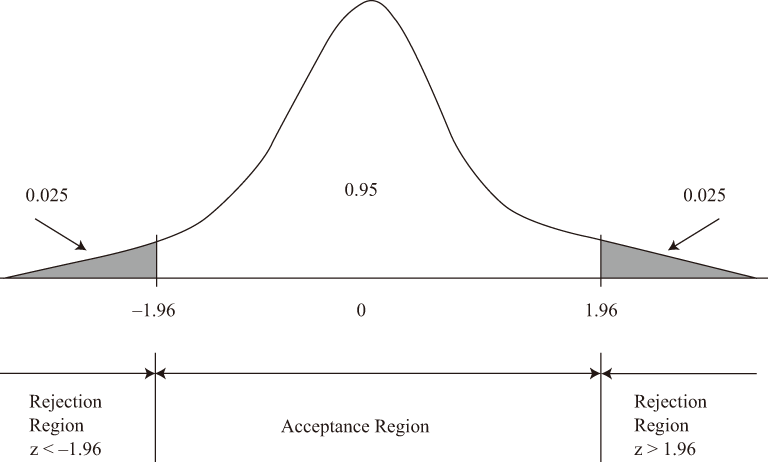

In [34]:
Image(filename='CFA0129-R-EXH2.png', width = 450, height = 100) 

**Example** Since it's one-tailed, the rejection point will be indicated by $z_{0.05}$, as assumed the test statistic follows a standard normal z-distribution, it can be found that $z_{0.5}$ is 1.645. We reject the null hypothesis if $z > 1.645$. The value of the standard normal distribution such that 5 percent of the outcomes lie to the right is $z_{0.05} = 1.645$. (Let $z$ represent the calculated value of the test statistic.)

In [35]:
# Step 4
rej_point = 1.645

**Example**<br>
Note that the arithmetic mean equity risk premium for US stocks relative to bill returns, $\bar{X}_{RP}$ was 7.5%, the sample standard deviation was 19.5%. In order to calculate the test statistic: <br>

In [36]:
# Step 5. Know that
mean = 0.075 
std = 0.195
n = 118
# Calculate the standard error of the sample mean
sesm = std / n**0.5
# Calculate the test statistic 
t_stat = (mean - 0) / sesm
print(sesm, t_stat)

0.017951205049017305 4.177992496615468


In [37]:
# Example step 6
if t_stat > rej_point: 
    print('We reject the null hypothesis in favor of the alternative hypothesis that the risk premium on US stocks is positive.')
else: 
    print('Fail to reject the null hypothesis')

We reject the null hypothesis in favor of the alternative hypothesis that the risk premium on US stocks is positive.


In [38]:
# Using Scipy to obtain the p_value (TBC)
p_value = scipy.stats.norm.sf(abs(t_stat)) # z-score
p_value # Correct answer is 0.000015

1.4704667741120198e-05

In [39]:
#scipy.stats.t.ppf(1-0.05, 117)

**Example** In the sixth step, we found strong statistical evidence that the US risk premium is positive. The magnitude of the estimated risk premium, 7.5 percent a year, is economically very meaningful as well. Based on these considerations, an investor might decide to commit funds to US equities.

## Hypothesis Tests Concerning the Mean
### Tests Concerning a Single Mean (T-Test, Z-Test)
#### T-Test
A `t-test` is a hypothesis test using a statistic (t-statistic) that follows a t-distribution. The t-distribution:
- is a probability distribution defined by a **single parameter**, degrees of freedom (df). 
- is more spread out: It has a $\sigma > 1$ and more probability for outcomes distant from the mean (it has fatter tails) than the standard normal distribution (z-test). 
- As the number of df increases with sample size, the spread decreases and the t-distribution approaches the standard normal distribution as a limit.

For hypothesis tests concerning the population mean of a normally distributed population with **unknown variance $\sigma^2$**, and if the population sampled has *unknown variance* and either of the conditions below holds:
- the sample is large (>=30), or
- the sample is small but the population sampled is normally distributed, or approximately normally distributed,
then the test statistic for hypothesis tests concerning a single population mean, $μ$, is

$$t_{n−1}=\frac{\bar{X}−μ_0}{s/\sqrt{n}}$$
<div style="text-align: right"> Equation 4</div>

where

$t_{n−1}$ = t-statistic with $n − 1$ degrees of freedom ($n$ is the sample size)

$\bar{X}$ = the sample mean

$μ_0$ = the hypothesized value of the population mean

$s$ = the sample standard deviation

The denominator of the t-statistic is an estimate of the sample mean standard error, $s\bar{X}=\frac{s}{\sqrt{n}}$
#### Z-Test
Practically speaking, the two tests are similar since the t-distribution approaches the z-distribution as $n$ gets large. 

1. If the population sampled is normally distributed with **known variance $σ^2$**, then the test statistic for a hypothesis test concerning a single population mean, $\mu$, is

$$z=\frac{\bar{X}−μ_0}{\sigma/\sqrt{n}}$$
<div style="text-align: right"> Equation 5</div>

2. If the population sampled has **unknown variance $s^2$** and the sample is large, in place of a t-test, an alternative test statistic (relying on the central limit theorem) is

$$z=\frac{\bar{X}−μ_0}{s/\sqrt{n}}$$
<div style="text-align: right"> Equation 6</div>

where

$\sigma$ = the known population standard deviation

$s$ = the sample standard deviation

$μ_0$ = the hypothesized value of the population mean

The following rejection points are commonly used for a z-test.
- $z_{0.005}=2.575$
- $z_{0.01}=2.33$
- $z_{0.025}=1.96$
- $z_{0.05}=1.645$
- $z_{0.10}=1.28$

### Differences Between Means (with Independent Samples)
#### When Variances are Assumed Euqal
When we can assume that the two populations are normally distributed and that the unknown population variances are equal, a `t-test` based on `independent random samples` is given by

$$t=\frac{(\bar{X_1}−\bar{X_2})−(μ_1−μ_2)}{\displaystyle\sqrt{(\frac{s^2_p}{n_1}+\frac{s^2_p}{n_2})}}$$
<div style="text-align: right"> Equation 7</div>

where  
- $s^2_p=\frac{(n_1−1)s^2_1+(n_2−1)s^2_2}{n_1+n_2−2}$, (a pooled estimator of the common variance), 
- $df = n_1 + n_2 − 2$.

#### When Variances are not Assumed Equal
When we can assume that the two populations are normally distributed but do not know the population variances and cannot assume that they are equal, an approximate t-test based on independent random samples is given by

$$t=\frac{(\bar{X_1}−\bar{X_2})−(μ_1−μ_2)}{\displaystyle\sqrt{(\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2})}}$$
<div style="text-align: right"> Equation 8</div>

where we use tables of the t-distribution using `“modified” degrees of freedom` computed with the formula
$$ df=\frac{(\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2})^2}{\frac{(\frac{s^2_1}{n_1})^2}{n_1}+\frac{(\frac{s^2_2}{n_2})^2}{n2}}$$
<div style="text-align: right"> Equation 9</div>

### Differences Between Means (with Dependent Samples) (Paired Comparison T-Test)
The prior tests were only valid if the samples were unrelated to each other (i.e., independent). Another method must be used if the independence assumption is not valid.

`Paired Observations` refer to observations that are dependent on each other. *(For example, the monthly returns of two funds over the same time period are likely related due to common market factors. A paired comparison test is a statistical test for differences in dependent items.)*

**By calculating a standard error based on differences, the t-test presented below takes account of correlation between the observations.**

The difference between two random variables taken from dependent samples, denoted di, is calculated. Then, the list of differences is statistically analyzed.

Assume $μ_d$ and $μ_{d0}$ represent the observed and hypothesized population mean difference, respectively. The hypotheses are normally formulated in the following manner:
- $H_0:μ_d=μ_{d0}$ versus $H_a:μ_d≠μ_{d0}$
- $H_0:μ_d≤μ_{d0}$ versus $H_a:μ_d>μ_{d0}$
- $H_0:μ_d≥μ_{d0}$ versus $H_a:μ_d<μ_{d0}$

For normally distributed populations with unknown population variances, the test statistic is:
1. Step 1 Find the **sample mean difference**
$$\bar{d}=\frac{1}{n}\sum_{i=1}^n{d_i}$$
<div style="text-align: right"> Equation 10</div>
where $n$ = number of pairs of observations. 

2. Step 2 The sample variance, denoted by $s^2_d$, is
$$s^2_d=\frac{\sum_{i=1}^n{(d_i−\bar{d})^2}}{n−1}$$
<div style="text-align: right"> Equation 11</div>

3. Step 3 `Standard error of the mean difference` using the sample standard deviation, $sd$

$$s_{\bar{d}}=\frac{s_d}{\sqrt{n}}$$
<div style="text-align: right"> Equation 12</div>

4. Step 5
$$t=\frac{\bar{d}−μ_{d_0}}{s\bar{d}}$$
<div style="text-align: right"> Equation 13</div>

where $df =n − 1$, 

$n$ = number of paired observations,

$\bar{d}$ = sample mean difference (as given by Equation 10),

$s_{\bar{d}}$ = standard error of $\bar{d}$ (as given by Equation 12).

Use cases: 
- the dividend policy of companies before and after a change in the tax law affecting the taxation of dividends. We then have pairs of “before” and “after” observations for the same companies.
- whether the mean returns earned by two investment strategies were equal over a study period. The observations here are dependent in the sense that there is one observation for each strategy in each month, and both observations depend on underlying market risk factors. Because the returns to both strategies are likely to be related to some common risk factors, such as the market return, the samples are dependent. 

**Example**
If the level of confidence is 0.10 with 24 samples, in a two-tailed test, the test statistic will be:
$t_{\frac{\alpha}{2}, 23}$

In [40]:
# Finding the t score at 0.05 level of confidence with 50-1 degree of freedom 
scipy.stats.t.ppf(1-0.05, 49)

1.6765508919142629

In [41]:
# Finding the t score at 0.01 level of confidence with 50-1 degree of freedom 
scipy.stats.t.ppf(1-0.01, 49)

2.4048917596601207

In [42]:
# Example 4, 5

**Example**<br>
Quarterly returns for a six-year period for two managed portfolios specializing in precious metals. we want to test the hypothesis that the mean quarterly return on Portfolio A equaled the mean quarterly return on Portfolio B during the six-year period. 

In [43]:
# Read in the data
df = pd.read_csv('metal_prices.csv', delimiter='\t')

In [45]:
# Change Quarter column into index
df.set_index('Quarter', inplace=True)

In [46]:
# Deleting first row as it's obsolete 
df = df.iloc[1:]

In [60]:
# Data cleanning
df['Portfolio A (%)'] = df['Portfolio A (%)'].str.replace('−', '-')
df['Portfolio B (%)'] = df['Portfolio B (%)'].str.replace('−', '-')
df['Difference'] = df['Difference'].str.replace('−', '-')
df = df.astype(float)

In [64]:
df.head()

,Portfolio A (%),Portfolio B (%),Difference
Quarter,,,
4Q:Year 6,11.40,14.64,-3.24
3Q:Year 6,-2.17,0.44,-2.61
2Q:Year 6,10.72,19.51,-8.79
1Q:Year 6,38.91,50.40,-11.49
4Q:Year 5,4.36,1.01,3.35


**Solution**<br>
Because the two portfolios shared essentially the same set of risk factors, their returns were not independent, so a paired comparisons test is appropriate. Let $μ_d$ stand for the population mean value of difference between the returns on the two portfolios during this period. We test $$H_0: μ_d = 0$$ versus $$H_a: μ_d ≠ 0$$ at a 0.05 and 0.10 significance level.

In [82]:
# Calculate the sample mean difference
diff = df['Difference'].sum()/len(df['Difference'])
diff

-0.6488

In [75]:
# Calculate the standard error of the mean difference
numerator = 0 
for i in range(len(df)):
    sqr_diff = df['Difference'][i] **2 
    numerator += sqr_diff

denominator = len(df) - 1
samp_var = (numerator / denominator)**0.5 
std_error = samp_var / len(df)**0.5

print(std_error) # slightly different with 6.71/(24**0.5) = 1.369673

1.3204691085620541


In [85]:
# Calculate test statistics with n-1 = 23 degree of freedom 
t_stat = (diff - 0) / (std_error)
t_stat

-0.4913405363238835

In [88]:
# Calculate the rejection points at 0.05 significance level
t_score = scipy.stats.t.ppf(1-0.025, 23)
print(t_score)

2.0686576104190406


In [86]:
# Making statistical decision
if t_stat < -t_score: 
    print('Reject null hypothesis.')
elif t_stat > t_score: 
    print('Reject null hypothesis.')
else: 
    print('Fail to reject null hypothesis.')

Fail to reject null hypothesis.


In [90]:
# Calculate the rejection points at 0.10 significance level
scipy.stats.t.ppf(1-0.05, 23)

1.7138715277470473

## Hypothesis Tests Concerning Variance and Correlation
### Tests Concerning a Single Variance
The hypotheses are formulated similarly for means and variances:
- $H_0:σ^2=σ^2_0$ versus $H_a:σ^2≠σ^2_0$
- $H_0:σ^2≤σ^2_0$ versus $H_a:σ^2>σ^2_0$
- $H_0:σ^2≥σ^2_0$ versus $H_a:σ^2<σ^2_0$

The `chi-square`, `χ2`, test statistic is used. It is an `asymmetrical` family of distributions defined with degrees of freedom. It does not take on negative values. The following rejection points are used for the three hypotheses. 
- $H_a:σ^2≠σ^2_0$ . Reject $H_0$ if the test statistic is greater than $χ^2_{\frac{α}{2}}$ or less than $χ^2_{1−\frac{α}{2}}$
- $H_a:σ^2>σ^2_0$. Reject $H_0$ if the test statistic is greater than $χ^2_α$
- $H_a:σ^2<σ^2_0$. Reject $H_0$ if the test statistic is less than $χ^2_{1−α}$

If we have $n$ independent observations from a normally distributed population, the appropriate test statistic is
$$χ^2=\frac{(n−1)s^2}{σ^2_0}$$
<div style="text-align: right"> Equation 14</div>
where $df=n − 1$,  $s^2=\frac{\sum_{i=1}^n{(X_i−\bar{X})^2}}{n−1}$
<div style="text-align: right"> Equation 15</div>

    In contrast to the t-test, for example, the chi-square test is sensitive to violations of its assumptions. If the sample is not actually random or if it does not come from a normally distributed population, inferences based on a chi-square test are likely to be faulty.
    

### Differences Between Variance

#### Rejection Points for Hypothesis Tests on the Population Variance
- “Not equal to” $H_a$: Reject the null hypothesis if the test statistic is greater than the upper $α/2$ point (denoted $χ^2_α/2$) or less than the lower $α/2$ point (denoted $χ^2_1−α/2$) of the chi-square distribution with $df = n − 1$.
- “Greater than” $H_a$: Reject the null hypothesis if the test statistic is greater than the upper α point of the chi-square distribution with $df = n − 1$.
- “Less than” $H_a$: Reject the null hypothesis if the test statistic is less than the lower α point of the chi-square distribution with $df = n − 1$.

### Equality (Inequality) of Two Variances (F-Test)
Like the chi-square distribution, the F-distribution is a family of `asymmetrical distributions` bounded from below by 0. **Each F-distribution is defined by two values of degrees of freedom**, called `the numerator and denominator degrees of freedom`. (The F-test, like the chi-square test, is not robust to violations of its assumptions.)

The hypotheses are formulated similarly for a single variance and for two variances.
- $H_0:σ^2_1=σ^2_2$ versus $H_a:σ^2_1≠σ^2_2$
- $H_0:σ^2_1≤σ^2_2$ versus $H_a:σ^2_1>σ^2_2$
- $H_0:σ^2_1≥σ^2_2$ versus $H_a:σ^2_1<σ^2_2$

A test concerning differences between the variances of the two populations is based on the ratio of sample variances
$$F=\frac{s^2_1}{s^2_2}$$
<div style="text-align: right"> Equation 16</div>

with 
- $df_1 = n_1 − 1$ `numerator degrees of freedom` and 
- $df_2 = n_2 − 1$ `denominator degrees of freedom`. 

Note that $df_1$ and $df_2$ are the divisors used in calculating $s^2_1$ and $s^2_2$, respectively.
#### Rejection Points for Hypothesis Tests on the Relative Values of Two Population Variances
- $H_a:σ^2_1≠σ^2_2$. Reject $H_0$ if the test statistic is greater than upper $\frac{α}{2}$ point of the F-distribution
- $H_a:σ^2_1>σ^2_2$. Reject $H_0$ if the test statistic is greater than upper $α$ point of the F-distribution
- $H_a:σ^2_1<σ^2_2$. Reject $H_0$ if the test statistic is greater than upper $α$ point of the F-distribution

### Tests Concerning Correlation
A `significance test of a correlation coefficient` allows us to assess whether the relationship between two random variables is the result of chance.
- $H_0$: the correlation in the population is 0 ($\rho = 0$); 
- $H_a$: the correlation in the population is different from 0 ($ρ ≠ 0$). 

As long as the two variables are distributed normally, we can test to determine whether the null hypothesis should be rejected using the sample correlation, $r$. The formula for the t-test is

$$t=\frac{r\sqrt{n−2}}{\sqrt{1−r^2}}$$
<div style="text-align: right"> Equation 17</div>

This test statistic has a t-distribution with $n − 2$ degrees of freedom if the null hypothesis is true.

The magnitude of $r$ needed to reject the null hypothesis $H_0: ρ = 0$ decreases as sample size $n$ increases.

**RECAP**

- data-mining bias
- sample selection bias
- look-ahead bias
- time-period bias
- Common values for a standard normal distribution (85%, 90%, 95%, 97.5% and 99%)
- What's a level of significance?
- What's the power of test?
- When to use Chi-square test? Formula?
- When to use F-test? Formula?
- Test concerning a single variance?
- Rejection rules for all tests. 


In [ ]:
# Example 8, 9

In [92]:
# Example 10
scipy.stats.t.ppf(1-0.025, 82)

1.9893185569368186

## Other Issues: Non-Parametric Inference
A test that is not concerned with a parameter, or that makes minimal assumptions about the population from which a sample comes.

#### Situations for Using Non-Parametric Testing 
- when the data we use do not meet distributional assumptions 
- when the data are given in ranks 
- when the hypothesis we are addressing does not concern a parameter

#### Nonparametric Tests Concerning Correlation: The Spearman Rank Correlation Coefficient